<center>
<h1>
<i>
 Códido de entrenamiento <b>YOLOv4 Tiny</b>
</i>
</h1>
</center>
<br/><br/>
<center>
<h4>Curso de inteligencia Artificial proyecto Jetbot</h4>
<h5><b><i>A self driven Robot</b></i></h5>
<center>
<br/>
<h5>Estudiantes</h5>
&#128187; Jaffette Solano Arias
<br/>
&#128187;Rebeca Bolaños Arce
<br/>
&#128187;Sarah Uriarte Porras
<br/>
&#128187;Ignacio Cruz Montero
<br/>
<br/>
<br/>
<p>&#128660; 	
&#128677;
&#128662; 	
&#128679;
&#128664;
&#128655;</p>

In [2]:
# Clonamos el repositorio de Darknet
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [3]:
# Nos posicionamos en el direcotrio de Darknet, habilitamos opencv y el uso de GPU
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [4]:
# verificamos que tengamos CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [5]:
# make darknet (compilamos darknet oara que podamos utilizarlos posteriormente como ejecutable para las pruebas y el entrenamiento)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [6]:
# Funciones Auxiliares

# Utilice esta funcion si desea visualizar una imagen
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# Utilice esta para cargar archivos
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# Utilice esta funcion para descargar algun archivo  
def download(path):
  from google.colab import files
  files.download(path)

In [7]:
# nos movemos al directorio general y montamos el drive para poder leer archivos necesarios para el entrenamiento
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [8]:
# Creamos una ruta simbolica a nuestro drive en lugar de  /content/gdrive/My\ Drive/ escribiremos /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 Alcance.gdoc
'Colab Notebooks'
'Desarrollo parte 1 (1).docx'
'Desarrollo parte 1.docx'
'Desarrollo parte 2.png'
'Horario Tutorías Taller Intro (Jaffette & Walter).gform'
 images
'Kickoff Meeting Agenda.docx.docx'
'Manual de Usuario'
'MIT Saving Faces'
'ML Books'
'obj (1).names'
 obj.names
 Professional_CV.pdf
'QA EJERCICIO 1.png'
'quiz2 QA.gsheet'
'quiz2 QA.xlsx'
 Resume
'Sistemas Operativos'
'Tabla de desicion.xlsx'
 Tarea_IA_2
'Tarea Innovación y Creatividad.gdoc'
'TEC CURSOS'
'TECNICA DE MULTIPLES CONDICIONES.xlsx'
'Tutorias introduccion a la Programacion'
'VISAS FORMS'
 yolov3tiny-obj.cfg
 yolov4
 yolov4Tiny


In [9]:
# Regresamos a la carpeta donde se encuentra darknet
%cd darknet

/content/darknet


In [10]:
# Aqui es donde almacenaremos los pesos generados y donde tenemos nuestro cfg,obj.names, obj.data
!ls /mydrive/yolov4Tiny

 backup		     obj.names	   yolov3-tiny.conv.11
 generate_train.py   obj.zip	   yolov3Tiny-obj.cfg
 obj.data	     Readme.gdoc  'yolov4tiny files'


In [11]:
# Copiamos el dataset en la carpeta raiz del directorio desde google Drive
!cp /mydrive/yolov4Tiny/obj.zip ../

In [12]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/00575eb0-bb15-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/00575eb0-bb15-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/03576f90-bb12-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/03576f90-bb12-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/0406df8e-bb1c-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/0406df8e-bb1c-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/0496c332-bb18-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/0496c332-bb18-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/068a06ec-bb1b-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/068a06ec-bb1b-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/0754c570-bb12-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/0754c570-bb12-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/075d185e-bb14-11ea-9fad-4c1d96ff1cde.jpg  
  inflating: data/obj/075d185e-bb14-11ea-9fad-4c1d96ff1cde.txt  
  inflating: data/obj/08130b48-bb17-11ea-9fad-4c1d96ff1cde.jpg  
  in

In [ ]:
# Copiamos el archivo de yolo tiny cfg a nuestra carpeta de drive hacerlo solo si no lo tenenemos ya
#!cp cfg/yolov4-tiny-custom.cfg /mydrive/yolov4Tiny/yolov4-obj.cfg

In [13]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4Tiny/yolov3Tiny-obj.cfg ./cfg

In [14]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4Tiny/obj.names ./data
!cp /mydrive/yolov4Tiny/obj.data  ./data

In [16]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4Tiny/generate_train.py ./

In [17]:
!python generate_train.py

In [19]:
!cp /mydrive/yolov4Tiny/yolov3-tiny.conv.11 ./

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


Entrenar por por primera vez

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3Tiny-obj.cfg yolov3-tiny.conv.11 -dont_show 

Entrenar desde un peso ya existente (continuear entrenamiento)

In [20]:
!./darknet detector train data/obj.data cfg/yolov3Tiny-obj.cfg /mydrive/yolov4Tiny/backup/yolov3Tiny-obj_last.weights -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.877622, GIOU: 0.876901), Class: 0.999618, Obj: 0.991321, No Obj: 0.002887, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.000302, iou_loss = 0.041414, total_loss = 0.041716 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 503863, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 16 Avg (IOU: 0.826766, GIOU: 0.822802), Class: 0.881746, Obj: 0.810573, No Obj: 0.002447, .5R: 1.000000, .75R: 0.750000, count: 4, class_loss = 0.283174, iou_loss = 0.183406, total_loss = 0.466579 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 23 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000

Pesos del modelo para ver los resultados

In [ ]:
 %cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=32/subdivisions=1/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
 %cd cfg
!sed -i 's/batch=1/batch=64/' yolov4-obj.cfg
!sed -i 's/subdivisions=1/subdivisions=32/' yolov4-obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    608 x 608 x   3 ->  304 x 304 x  32 0.160 BF
   1 conv     64       3 x 3/ 2    304 x 304 x  32 ->  152 x 152 x  64 0.852 BF
   2 conv     64       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x  64 1.703 BF
   3 route  2 		                       1/2 ->  152 x 152 x  32 
   4 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   5 conv     32       3 x 3/ 1    152 x 152 x  32 ->  152 x 152 x  32 0.426 BF
   6 route  5 4 	                           ->  152 x 152 x  64 
   7 conv     64       1 x 1/ 1    152 x 152 x  64 ->  152 x 152 x  64 0.189 BF
   8 route  2 7 	                           ->  152 x 152 

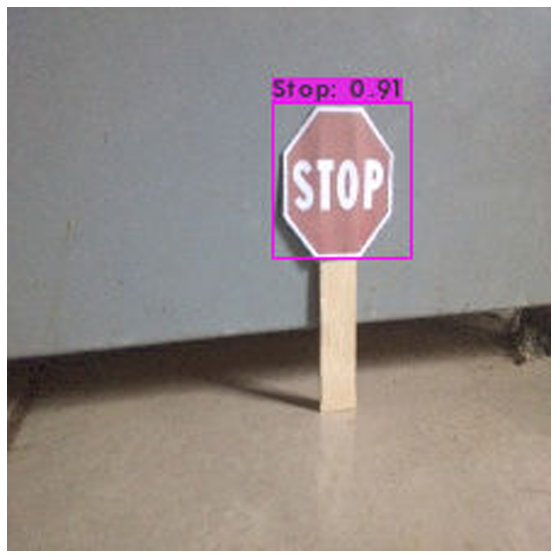

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4Tiny/backup/yolov4-obj_last.weights /mydrive/images/stop.jpg -thresh 0.9
imShow('predictions.jpg')